# Pandas `Series` Exercises

Now that we have learned quite a lot about Pandas `Series`, `DataFrame`s and plotting, it is time to refresh the content of the past days by working on some exercises.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-colorblind")

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.2.3', Numpy version: np.__version__ = '2.2.3'"

## Creation and element access

### Ways to create a `Series`

You are given the following Python containers. Use them to create a `Series` in two different ways.

In [2]:
index, values = [f"a{idx}" for idx in range(len(range(0, 11, 2)))], list(
    range(0, 11, 2)
)
index, values

(['a0', 'a1', 'a2', 'a3', 'a4', 'a5'], [0, 2, 4, 6, 8, 10])

In [3]:
pd.Series(index=index, data=values)

a0     0
a1     2
a2     4
a3     6
a4     8
a5    10
dtype: int64

In [4]:
pd.Series(
    {
        index_label: value for index_label, value in zip(index, values)
    }
)

a0     0
a1     2
a2     4
a3     6
a4     8
a5    10
dtype: int64

### Type conversion

Using the same Python containers as in the previous exercise, generate a `Series` containing the elements of the `values` container as 32-bit floating point values.

In [5]:
index, values = [f"a{idx}" for idx in range(len(range(0, 11, 2)))], list(
    range(0, 11, 2)
)
index, values

(['a0', 'a1', 'a2', 'a3', 'a4', 'a5'], [0, 2, 4, 6, 8, 10])

In [6]:
pd.Series(index=index, data=values, dtype=np.float32)

a0     0.0
a1     2.0
a2     4.0
a3     6.0
a4     8.0
a5    10.0
dtype: float32

In [7]:
pd.Series(index=index, data=values).astype('float32')

a0     0.0
a1     2.0
a2     4.0
a3     6.0
a4     8.0
a5    10.0
dtype: float32

### Accessing the index

Given the series below access the elements with index labels `"a"`, `"f"`, and `"i"` in three different ways.

In [8]:
s = pd.Series(range(10, 110, 10), list("abcdefghij"))
s

a     10
b     20
c     30
d     40
e     50
f     60
g     70
h     80
i     90
j    100
dtype: int64

In [9]:
labels_to_access = ['a', 'f', 'i']
s.loc[labels_to_access]

a    10
f    60
i    90
dtype: int64

In [10]:
s.loc[[label in labels_to_access for label in s.index]]

a    10
f    60
i    90
dtype: int64

In [11]:
s.loc[s.index.isin(labels_to_access)]

a    10
f    60
i    90
dtype: int64

### Filtering elements

Given the `Series` below, return a `Series` that contains al elements that are close to the corresponding integer part (ignoring all decimal places) within 0.001%.

In [12]:
s = pd.Series([1.1, 2.0, 3.001, 10.5, 4.0, 5, 7.00001, 12.0])
s

0     1.10000
1     2.00000
2     3.00100
3    10.50000
4     4.00000
5     5.00000
6     7.00001
7    12.00000
dtype: float64

In [13]:
s.loc[
    (
        (s.astype(int) - s)
        .abs()
        .div(s.astype(int))
        .lt(0.001 / 100)
    )
]

1     2.00000
4     4.00000
5     5.00000
6     7.00001
7    12.00000
dtype: float64

From the same `Series` *with all its elements converted to integers* return another `Series` that contains all even entries.

In [14]:
(
    s
    .astype('int')
    .loc[lambda x: x % 2 == 0]
)

1     2
3    10
4     4
7    12
dtype: int64

### Modifying elements

You are given the `Series` below. Replace the values at index labels `"c"`, `"d"`, `"e"`, and `"f"` with the value -1000 *in one of the copies of `s`*. Come with three different methods to accomplish these changes. For each of the different approaches of copy of the original `Series` is available below.

In [15]:
s = pd.Series(range(10, 110, 10), list("abcdefghij"))
s

a     10
b     20
c     30
d     40
e     50
f     60
g     70
h     80
i     90
j    100
dtype: int64

In [16]:
s_copy1 = s.copy(deep=True)  # execute this line before making changes in the cell below

In [17]:
s_copy1.loc["c":"f"] = -1000
s_copy1

a      10
b      20
c   -1000
d   -1000
e   -1000
f   -1000
g      70
h      80
i      90
j     100
dtype: int64

In [18]:
s_copy2 = s.copy(deep=True)  # execute this cell before making changes in the cell below

In [19]:
s_copy2.loc[['c', 'd', 'e', 'f']] = -1000
s_copy2

a      10
b      20
c   -1000
d   -1000
e   -1000
f   -1000
g      70
h      80
i      90
j     100
dtype: int64

In [20]:
s_copy3 = s.copy(deep=True)  # execute this cell before making changes in the cell below

In [21]:
s_copy3.loc[[label in ['c', 'd', 'e', 'f'] for label in s_copy3.index]] = -1000
s_copy3

a      10
b      20
c   -1000
d   -1000
e   -1000
f   -1000
g      70
h      80
i      90
j     100
dtype: int64

### `Series` with duplicate entries in the index

The `Series` given below has duplicated entries in its index. Access all elements sharing this index label. Afterward return a `Series` where the duplicate entries have been removed.

*Hint*: You can for example use a boolean mask to accomplish the removal. Can you come up with different ways to create such a boolean mask?

In [22]:
s = pd.Series(range(10), index=["a", "b", "a", "a", "c", "d", "e", "f", "a", "g"])
s

a    0
b    1
a    2
a    3
c    4
d    5
e    6
f    7
a    8
g    9
dtype: int64

Get all values at duplicate  index entries.

In [23]:
s.loc['a']

a    0
a    2
a    3
a    8
dtype: int64

Return `Series` without all duplicate index labels.

In [24]:
s.loc[~s.index.str.contains('a')]

b    1
c    4
d    5
e    6
f    7
g    9
dtype: int64

In [25]:
s.loc[[label != 'a' for label in s.index]]

b    1
c    4
d    5
e    6
f    7
g    9
dtype: int64

## Operations between `Series`

### Arithmetic

Given the `Series` below, compute their sum, difference, product and division. Do by using 1. the usual arithmetic operator, and 2. an appropriate method call.

In [26]:
s1, s2 = pd.Series(range(1, 6)), pd.Series(range(5, 0, -1))
s1, s2

(0    1
 1    2
 2    3
 3    4
 4    5
 dtype: int64,
 0    5
 1    4
 2    3
 3    2
 4    1
 dtype: int64)

In [57]:
s1 + s2, s1.add(s2)

(a    11.0
 b    22.0
 c    33.0
 d    44.0
 e    55.0
 f     NaN
 g     NaN
 dtype: float64,
 a    11.0
 b    22.0
 c    33.0
 d    44.0
 e    55.0
 f     NaN
 g     NaN
 dtype: float64)

In [58]:
s1 - s2, s1.sub(s2)

(a    -9.0
 b   -18.0
 c   -27.0
 d   -36.0
 e   -45.0
 f     NaN
 g     NaN
 dtype: float64,
 a    -9.0
 b   -18.0
 c   -27.0
 d   -36.0
 e   -45.0
 f     NaN
 g     NaN
 dtype: float64)

In [59]:
s1 * s2, s1.mul(s2)

(a     10.0
 b     40.0
 c     90.0
 d    160.0
 e    250.0
 f      NaN
 g      NaN
 dtype: float64,
 a     10.0
 b     40.0
 c     90.0
 d    160.0
 e    250.0
 f      NaN
 g      NaN
 dtype: float64)

In [60]:
s1 / s1, s1.div(s2)

(a    1.0
 b    1.0
 c    1.0
 d    1.0
 e    1.0
 dtype: float64,
 a    0.1
 b    0.1
 c    0.1
 d    0.1
 e    0.1
 f    NaN
 g    NaN
 dtype: float64)

### Match by index

The `Series` given below have different sizes and hence do not share the same index. Compute the result of adding both `Series`.

In [31]:
s1 = pd.Series(range(1, 6), index=list("abcde"))
s2 = pd.Series(range(70, 0, -10), index=list("abcdefg")[::-1])
s1, s2

(a    1
 b    2
 c    3
 d    4
 e    5
 dtype: int64,
 g    70
 f    60
 e    50
 d    40
 c    30
 b    20
 a    10
 dtype: int64)

1. Remove all elements for which no result is obtained.

In [62]:
(s1 + s2).dropna()

a    11.0
b    22.0
c    33.0
d    44.0
e    55.0
dtype: float64

2. Fill all elements with no result with a default value of your choice.

In [65]:
(s1 + s2).fillna(-1000)

a      11.0
b      22.0
c      33.0
d      44.0
e      55.0
f   -1000.0
g   -1000.0
dtype: float64

## `Series` method calls

### Statistics

Given the `Series` below determine the minimal, maximal, mean, and median value. Do so in three different ways.

*Hint*: The `.apply()` method can also reduce.

In [66]:
s = pd.Series(np.random.normal(size=200))

In [68]:
s.describe().loc[["min", "max", "mean", "50%"]]

min    -2.613807
max     2.671980
mean    0.075700
50%     0.098854
dtype: float64

In [69]:
s.agg(["min", "max", "mean", "median"])

min      -2.613807
max       2.671980
mean      0.075700
median    0.098854
dtype: float64

In [70]:
s.apply({
    "min": lambda s: s.min(),
    "max": lambda s: s.max(),
    "mean": lambda s: s.mean(),
    "median": lambda s: s.median(),    
})

min      -2.613807
max       2.671980
mean      0.075700
median    0.098854
dtype: float64

### Centering on the mean

Subtract the mean value computed for the `Series` below from all of its elements. Do so by using 

1. the `.transform()` method,
2. the `.apply()` method.
3. another method you can think of.

In [71]:
s = pd.Series(range(20, 110, 10))
s

0     20
1     30
2     40
3     50
4     60
5     70
6     80
7     90
8    100
dtype: int64

In [72]:
s.transform(lambda s: s - s.mean())

0   -40.0
1   -30.0
2   -20.0
3   -10.0
4     0.0
5    10.0
6    20.0
7    30.0
8    40.0
dtype: float64

In [74]:
s.apply(lambda s: s - s.mean(), by_row=False)

0   -40.0
1   -30.0
2   -20.0
3   -10.0
4     0.0
5    10.0
6    20.0
7    30.0
8    40.0
dtype: float64

In [75]:
s.sub(s.mean())

0   -40.0
1   -30.0
2   -20.0
3   -10.0
4     0.0
5    10.0
6    20.0
7    30.0
8    40.0
dtype: float64

### Fix me!

What is the issue with the following line of code? The code is *commented* and will not execute until you remove the `#`.

In [77]:
# pd.Series(range(10)).transform(lambda s: s.mean())

### Computing with NaNs

The `Series` below contains several `NaN` entries.

In [85]:
data = np.array(list(range(5)) + [np.nan] * 4 + list(range(10, 50, 10)))
np.random.shuffle(data)
s = pd.Series(data)
s

0     20.0
1      NaN
2      1.0
3      NaN
4      NaN
5     40.0
6      4.0
7      3.0
8     30.0
9      2.0
10     0.0
11     NaN
12    10.0
dtype: float64

1. Compute the mean and the median value. 

In [89]:
s.agg(["mean", "median"], skipna=True)

mean      12.222222
median     4.000000
dtype: float64

In [90]:
s.dropna().agg(["mean", "median"])
# s.mean(skipna=False)

mean      12.222222
median     4.000000
dtype: float64

2. Recompute the mean and the median values but before doing this, replace the "missing values" (all the `NaN`s) with `np.pi`. Conduct this replacement in two different ways.

*Hint*: One way to achieve this is the `.where()`  method.

In [92]:
(
    s
    .fillna(np.pi)
    .agg(["mean", "median"])
)

mean      9.428182
median    3.141593
dtype: float64

In [95]:
(
    s
    .where(lambda s_: s_.notna(), np.pi) 
    .agg(["mean", "median"])
)

mean      9.428182
median    3.141593
dtype: float64

## Plotting with `Series`

### Basic

Create a histogram plot for the data in the following `Series`.

In [96]:
s = pd.Series(
    np.concatenate(
        (
            np.random.normal(loc=0, scale=0.75, size=500),
            np.random.normal(loc=3, scale=0.5, size=500),
        ),
        axis=0,
    )
)

<Axes: ylabel='Frequency'>

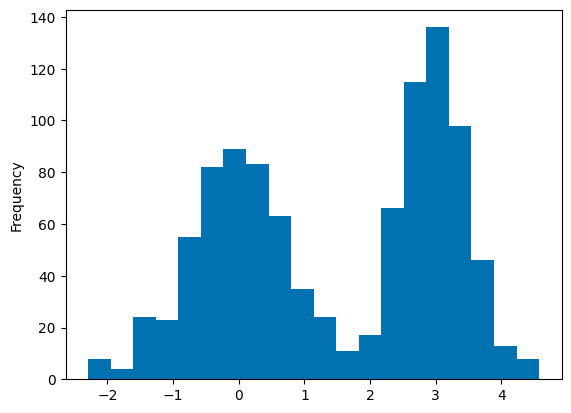

In [98]:
s.plot.hist(bins=20)

Now create a boxplot.

<Axes: >

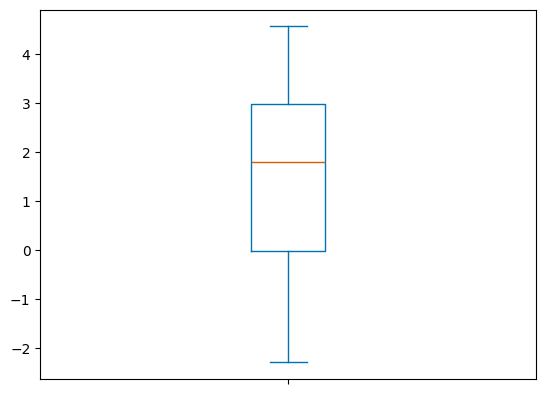

In [99]:
s.plot.box()

Now create a violin plot.

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7efeed791850>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7efeeaadfef0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7efeeabb5550>,
 'cbars': <matplotlib.collections.LineCollection at 0x7efeea9221b0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7efeea9226f0>}

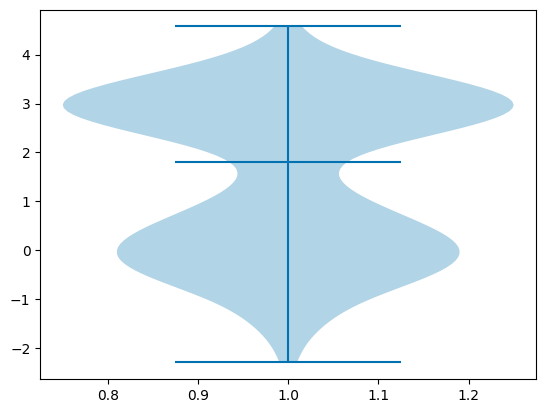

In [101]:
fig, ax = plt.subplots(1, 1)

ax.violinplot(s, showextrema=True, showmedians=True)

### Subplots

You are given the `Series` below that contains duplicated index entries of three kinds: `"classA"`, `"classB"`, and `"classC"`.

In [51]:
s = pd.Series(
    np.concatenate(
        (
            np.random.normal(loc=2, scale=1, size=200),
            np.random.normal(loc=5, scale=0.5, size=200),
            np.random.normal(loc=3, scale=1.15, size=100),
            np.random.normal(loc=8, scale=0.75, size=200),
        ),
        axis=0,
    ),
    index=["classA"] * 200 + ["classB"] * 200 + ["classC"] * 100 + ["classC"] * 200,
)

Create a histogram plot of the that allows to distinguish all three classes; in particular the peaks of the single distributions must be visible. Make sure to add a legend so all classes can be distinguished.

In [52]:
# Fill the gap!

Now create a 3x1 grid of subplots. Each subplot shall hold a histogram of a particular class and the subplots shall share a common x-axis.

In [53]:
# Fill the gap!

### Polling for data

Suppose you have conducted an anonymous poll in which --- amongst other things --- you have asked participants to provide information regarding employment status. Annoyingly, the online form to gather the data contained a field in which people could write arbitray text (maybe the number of characters was limited) instead of a drop-down menu that provides several answers from which people can choose what fits them best. Anyway, as a result you are getting some answers which are not really suitable for your research (e.g. "Working with the Avengers"). You have to apply some of the techniques just learned about manipulating `Series` to bring the data into a form suitable for further processing.

To keep things simple let's assume the answers you were hoping for are `"Employed"` (or `"employed"` --- yes, capitalization can will also get in your way here ;-)), and `"Unemployed"` (or `"unemployed"`). We consider these as 'usable' while the rest is 'unusable' (we assume that the poll does not containe further information that allows to make them 'usable').

Replace all entries you consider 'unusable' with `"unknown"`. Futher change all 'usable' entries to lowercase.

Generate two plots side-by-side that show *one* of the following (you choose!):

* The counts of each category from the *uncleaned* dataset on the left and the counts of each category in *cleaned* dataset on the right.
* The relative proportions of the categories from the *uncleaned* dataset on the left and the relative proportions from the uncleaned dataset on right.

Depending on what kind visualization form you use, choose an appropriate plot.

In [54]:
rng = np.random.default_rng(seed=42)

data = np.array(
    ["Employed"] * rng.choice(range(2000, 5000))
    + ["employed"] * rng.choice(range(100, 500))
    + ["Unemployed"] * rng.choice(range(200, 400))
    + ["unemployed"] * rng.choice(range(50, 70))
    + ["Rate mal"] * rng.choice(range(10, 20))
    + ["Having fun all day"] * rng.choice(range(50, 100))
    + ["geht dich nix an"] * rng.choice(range(20, 60))
)
rng.shuffle(data)

poll = pd.Series(data=data)
poll

0         Employed
1         Employed
2         employed
3       Unemployed
4         Employed
           ...    
3188      Employed
3189      Employed
3190      Employed
3191      Employed
3192      Employed
Length: 3193, dtype: object

In [55]:
# Fill the gap!

In [56]:
# Fill the gap!